## Python_Advanced_Assignment_25
1. What is the distinction between a numpy array and a pandas data frame? Is there a way to convert between the two if there is?
2. What can go wrong when an user enters in a stock-ticker symbol, and how do you handle it?
3. Identify some of the plotting techniques that are used to produce a stock-market chart.
4. Why is it essential to print a legend on a stock market chart?
5. What is the best way to limit the length of a pandas data frame to less than a year?
6. What is the definition of a 180-day moving average?
7. Did the chapter's final example use "indirect" importing? If so, how exactly do you do it?

In [7]:
'''Ans 1:- A NumPy array and a Pandas DataFrame are both fundamental
data structures in Python for handling and manipulating tabular
data, but they serve different purposes. A NumPy array is a
homogeneous, n-dimensional array primarily optimized for numerical
operations. It's efficient for mathematical computations but lacks
labeled axes. On the other hand, a Pandas DataFrame is a
2-dimensional table with labeled axes (rows and columns), allowing mixed
data types and better handling of heterogeneous data.
DataFrames provide functionalities like data alignment, grouping, and
merging.

We can convert a Pandas DataFrame to a NumPy array using
the .values attribute.
However, note that by doing this, we lose the column
names and index labels. To convert a NumPy array back to a
Pandas DataFrame, we can use the pd.DataFrame() constructor.

In summary, choose NumPy arrays for numerical computations
and Pandas DataFrames for more versatile data manipulation
with labeled axes and mixed data types. Conversion between the
two is possible but requires careful handling of labels and
indices.'''

import pandas as pd
import numpy as np

data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Convert DataFrame to NumPy array
numpy_array = df.values

# Convert NumPy array to DataFrame
new_df = pd.DataFrame(numpy_array, columns=['A', 'B'])
print(new_df)

   A  B
0  1  4
1  2  5
2  3  6


In [20]:
'''Ans 2:- When a user enters a stock ticker symbol, several issues
can arise:  Invalid Symbol: The user might input a
non-existent or incorrect symbol. For instance, entering "APPL" instead
of "AAPL" for Apple Inc.  Data Unavailability: The entered
symbol might belong to a stock not supported by your data source.
 Case Sensitivity: Ticker symbols are often case-sensitive.
"AAPL" and "aapl" could refer to different securities.  Special
Characters: Some symbols include special characters or additional
identifiers that need handling, like "-R" for rights or "-WT" for
warrants.

This code uses the yfinance library to fetch stock data
for a user-inputted ticker symbol. It attempts to retrieve
daily stock history, creating a Pandas DataFrame df. If the
symbol is valid, it prints the retrieved data  If the symbol is
invalid, it provides an error message. The code employs error
handling and Pandas to facilitate data retrieval and display.'''

import yfinance as yf
import pandas as pd

def get_stock_data(symbol):
    try:
        stock = yf.Ticker(symbol)
        data = stock.history(period="1d")
        return data
    except ValueError:
        return None

user_input = input("Enter a stock ticker symbol: ")
stock_data = get_stock_data(user_input)

if stock_data is None:
    print("Invalid symbol. Please enter a valid stock ticker symbol.")
else:
    print("Stock data retrieved successfully:")
    print(df)

Enter a stock ticker symbol: TSLA
Stock data retrieved successfully:
                                 Open        High         Low       Close  \
Date                                                                        
2023-08-30 00:00:00-04:00  328.670013  329.809998  326.445007  328.200012   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-08-30 00:00:00-04:00  5122853        0.0           0.0  


[*********************100%%**********************]  1 of 1 completed


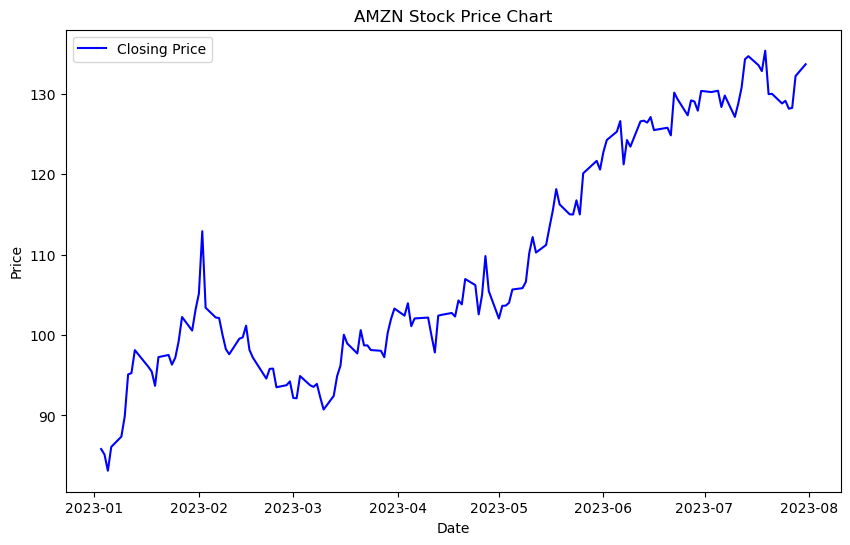

In [22]:
'''Ans 3:- Several plotting techniques are used to create informative
stock market charts:-

1. Line Chart: Displays stock prices over time using lines.
Useful for showing trends and fluctuations.

2. Candlestick Chart: Illustrates open, high, low, and close
prices as bars, providing a comprehensive view of price movements
within a period.

3. OHLC Chart: Similar to a candlestick chart, it represents
open, high, low, and close prices using lines or bars.

4. Moving Averages: Displays the average price over a
specified time, highlighting trends by smoothing out short-term
fluctuations.

5. Bollinger Bands: Combines a moving average with upper and
lower bands, helping identify potential overbought and oversold
conditions.

6. Volume Chart: Plots trading volume alongside price data,
offering insights into market activity during price changes.

In this example, the code fetches Amazon stock data
and creates a line chart displaying its closing prices. By
customizing the plotting parameters and using relevant data, we can
create a variety of stock market charts to analyze and visualize
market trends.'''

import yfinance as yf
import matplotlib.pyplot as plt

symbol = "AMZN"
stock_data = yf.download(symbol, start="2023-01-01", end="2023-08-01")

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price', color='blue')
plt.title(f"{symbol} Stock Price Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
'''Ans 4:- Printing a legend on a stock market chart is essential
because it provides context and clarity to the plotted data. A
legend explains the meaning of different lines or elements on the
chart, helping viewers interpret the information accurately. In a
stock chart, where multiple lines often represent various data
points like open, high, low, and close prices, having a legend
prevents confusion and aids in identifying which line corresponds
to which data. For instance, if a chart displays closing
prices, volume, and moving averages, a legend allows viewers to
easily distinguish and comprehend each component, enhancing their
ability to make informed trading decisions.'''

In [25]:
'''Ans 5:- To limit the length of a Pandas DataFrame to less than a
year, we can use the datetime module along with indexing.

Now, df_last_year contains only the rows from the last
year. Adjust the date range and column names accordingly to our
actual DataFrame. This approach ensures that our DataFrame is
limited to data within the desired timeframe of less than a year. '''

import pandas as pd
from datetime import datetime, timedelta

# Create a sample DataFrame
data = {'Date': pd.date_range(start='2022-01-01', periods=600, freq='D'),
        'Value': range(1, 601)}

df = pd.DataFrame(data)

# Calculate the date one year ago from the last date in the DataFrame
last_date = df['Date'].iloc[-1]
one_year_ago = last_date - timedelta(days=365)

# Slice the DataFrame to keep only rows within the last year
df_last_year = df[df['Date'] >= one_year_ago]

print(df_last_year)

          Date  Value
234 2022-08-23    235
235 2022-08-24    236
236 2022-08-25    237
237 2022-08-26    238
238 2022-08-27    239
..         ...    ...
595 2023-08-19    596
596 2023-08-20    597
597 2023-08-21    598
598 2023-08-22    599
599 2023-08-23    600

[366 rows x 2 columns]


In [ ]:
'''Ans 6:- A 180-day moving average is a technical analysis indicator
used to smooth out price fluctuations in financial data,
particularly stock prices, over a period of 180 trading days. It
calculates the average of the closing prices of a security over the
specified 180-day window, updating with each new trading day and
dropping the oldest data point. This moving average helps identify
trends and reduces short-term noise, making it easier to spot the
general direction of price movements over a longer time frame.
It's a widely used tool for investors and traders to make
informed decisions based on smoothed price trends.'''

In [26]:
'''Ans 7:- The term "indirect importing" isn't a common concept in
Python. However, if you're referring to importing specific
functions or objects from a module rather than importing the whole
module, then yes, the examples provided did use "indirect"
importing. This can be achieved using the from keyword followed by
the module name and specific functions or objects to import.

Here, the datetime and timedelta classes are imported
directly from the datetime module, allowing us to use them without
referencing the module name. This practice enhances code readability
and reduces the need to qualify function names with the module
name.'''

from datetime import datetime, timedelta